In [58]:
import pandas as pd
df = pd.read_csv('scraping_original.csv')
df.head()

,Comment,Rating,r
0,From last 5 years my younger brother was using...,5,1
1,excellent phone camera is very nice and the st...,4,1
2,I have been using the earlier versions of iPho...,4,1
3,IMPORTANT NOTICEIf you buy some apple device o...,5,1
4,"Well, what can I say... iPhone is awesome as e...",5,1


In [59]:
## Lower Case

df['Comment'] = df['Comment'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Comment'].head()

0    from last 5 years my younger brother was using...
1    excellent phone camera is very nice and the st...
2    i have been using the earlier versions of ipho...
3    important noticeif you buy some apple device o...
4    well, what can i say... iphone is awesome as e...
Name: Comment, dtype: object

In [60]:
## Removing Punctuation

df['Comment'] = df['Comment'].str.replace('[^\w\s]','')
df['Comment'].head()

<ipython-input-60-a3504637f60c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Comment'] = df['Comment'].str.replace('[^\w\s]','')


0    from last 5 years my younger brother was using...
1    excellent phone camera is very nice and the st...
2    i have been using the earlier versions of ipho...
3    important noticeif you buy some apple device o...
4    well what can i say iphone is awesome as expec...
Name: Comment, dtype: object

In [61]:
## Number of Stop Words

#from nltk.corpus import stopwords
#stop = stopwords.words('english')

#df['stopwords'] = df['Comment'].apply(lambda x: len([x for x in x.split() if x in stop]))
#df[['Comment','stopwords','Rating']].head()

In [62]:
## Removal of Stop Words

from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Comment'] = df['Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Comment'].head()

0    last 5 years younger brother using iphone 4s b...
1    excellent phone camera nice stereo speakers fa...
2    using earlier versions iphones therefore great...
3    important noticeif buy apple device online spe...
4    well say iphone awesome expected added prompt ...
Name: Comment, dtype: object

In [63]:
## Removal Of Numbers

df['Comment'] = df['Comment'].str.replace('\d+', '')
df.head()

<ipython-input-63-5f61b970b4bb>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Comment'] = df['Comment'].str.replace('\d+', '')


,Comment,Rating,r
0,last years younger brother using iphone s bou...,5,1
1,excellent phone camera nice stereo speakers fa...,4,1
2,using earlier versions iphones therefore great...,4,1
3,important noticeif buy apple device online spe...,5,1
4,well say iphone awesome expected added prompt ...,5,1


In [64]:
from nltk.tokenize import sent_tokenize, word_tokenize

#for i in df['Comments']:
    


print(sent_tokenize("hey there how are you"))
print(word_tokenize("hey there how are you"))

['hey there how are you']
['hey', 'there', 'how', 'are', 'you']


In [65]:
## Rare words removal

freq = pd.Series(' '.join(df['Comment']).split()).value_counts()[-10:]

freq = list(freq.index)
df['Comment'] = df['Comment'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Comment'].head()

0    last years younger brother using iphone s boug...
1    excellent phone camera nice stereo speakers fa...
2    using earlier versions iphones therefore great...
3    important noticeif buy apple device online spe...
4    well say iphone awesome expected added prompt ...
Name: Comment, dtype: object

In [66]:
## Spelling Correction

from textblob import TextBlob
df['Comment'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    last years younger brother using phone s bough...
1    excellent phone camera nice sterno speakers fa...
2    using earlier versions phone therefore great c...
3    important noticed buy apple device online spec...
4    well say phone awesome expected added prompt d...
Name: Comment, dtype: object

In [67]:
## Stemming

from nltk.stem import PorterStemmer
st = PorterStemmer()
df['Comment'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    last year younger brother use iphon s bought i...
1    excel phone camera nice stereo speaker fantast...
2    use earlier version iphon therefor great chang...
3    import noticeif buy appl devic onlin specif ph...
4    well say iphon awesom expect ad prompt deliver...
Name: Comment, dtype: object

##### We can even try to use Lemmatization.

In [120]:
## Bag Of words

from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
train_bow = bow.fit_transform(df['Comment'])
train_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
tf1 = (df['Comment'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1.head()

import numpy as np
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['Comment'].str.contains(word)])))
tf1.head()

# TF-IDF is the multiplication of the TF and IDF which we calculated above.

tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1.head()

,words,tf,idf,tfidf
0,go,1,0.491268,0.491268
1,gives,1,2.956605,2.956605
2,camera,1,0.882994,0.882994
3,fantastic,1,3.080219,3.080219
4,speakers,1,3.884591,3.884591


https://towardsdatascience.com/different-techniques-to-represent-words-as-vectors-word-embeddings-3e4b9ab7ceb4

In [122]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(norm = None, n_features = 17)
sentence_vectors = vectorizer.fit_transform(df['Comment'])
print(sentence_vectors.toarray())

[[ 3. -2.  0. ... -2.  1.  3.]
 [ 1. -1.  0. ... -1.  3. -1.]
 [ 1. -1. -1. ...  1.  0. -1.]
 ...
 [ 0.  0.  0. ...  0.  0.  1.]
 [ 0.  3.  1. ... -1.  0.  1.]
 [ 1.  3.  0. ...  1. -2.  2.]]


In [124]:
type(sentence_vectors)

scipy.sparse.csr.csr_matrix

In [30]:
df.head()

,Comment,Rating,r,stopwords
0,last years younger brother using iphone s boug...,5,1,36
1,excellent phone camera nice stereo speakers fa...,4,1,12
2,using earlier versions iphones therefore great...,4,1,35
3,important noticeif buy apple device online spe...,5,1,30
4,well say iphone awesome expected added prompt ...,5,1,34


In [16]:
import pandas as pd
df1 = pd.read_csv('scraping_original.csv')
df1.head()

,Comment,Rating,r
0,From last 5 years my younger brother was using...,5,1
1,excellent phone camera is very nice and the st...,4,1
2,I have been using the earlier versions of iPho...,4,1
3,IMPORTANT NOTICEIf you buy some apple device o...,5,1
4,"Well, what can I say... iPhone is awesome as e...",5,1


In [17]:
df1 = df1[['Comment','r']]

In [69]:
import nltk
from nltk.tokenize import word_tokenize
reviews = df.Comment.str.cat(sep=' ')

#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

2536


['phone',
 'good',
 'camera',
 'iphone',
 'flipkart',
 'delivery',
 'battery',
 'really',
 'awesome',
 'performance',
 'great',
 'also',
 'nice',
 'best',
 'mobile',
 'display',
 'quality',
 'got',
 'product',
 'one',
 'back',
 'price',
 'amazing',
 'fast',
 'honor',
 'like',
 'vivo',
 'android',
 'using',
 'looks',
 'day',
 'money',
 'time',
 'gb',
 'better',
 'excellent',
 'first',
 'features',
 'front',
 'light',
 'screen',
 'phones',
 'well',
 'superb',
 'black',
 'get',
 'received',
 'review',
 'super',
 'device']

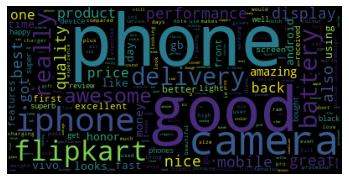

In [70]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [72]:
df.head()

,Comment,Rating,r
0,last years younger brother using iphone s boug...,5,1
1,excellent phone camera nice stereo speakers fa...,4,1
2,using earlier versions iphones therefore great...,4,1
3,important noticeif buy apple device online spe...,5,1
4,well say iphone awesome expected added prompt ...,5,1


In [111]:
X = df['Comment']
y = df['r']

In [149]:
sentence_vectors.shape

(827, 17)

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sentence_vectors,y,test_size = 0.30, random_state= 355)

In [127]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#X_train = X_train.values 
#X_test = X_test.values
y_train = y_train.values
Y_test = y_test.values

(578, 17)
(249, 17)
(578,)
(249,)


In [103]:
X_train = df.loc[:500, 'Comment'].values
y_train = df.loc[:500, 'r'].values
X_test = df.loc[501:, 'Comment'].values
y_test = df.loc[501:, 'r'].values

In [109]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(578, 1)
(249, 1)
(578,)
(249,)


In [114]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)
print(train_vectors.shape, test_vectors.shape)

(578, 2200) (249, 2200)


In [115]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

In [116]:
from  sklearn.metrics  import accuracy_score
predicted = clf.predict(test_vectors)
print(accuracy_score(y_test,predicted))

0.9397590361445783


In [129]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


rand_clf = RandomForestClassifier(random_state=6)
rand_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=6)

In [130]:
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [133]:
grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 20736 candidates, totalling 103680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  9.3min


KeyboardInterrupt: 

In [138]:
#let's see the best parameters as per our grid search
#grid_search.best_params_

rand_clf = RandomForestClassifier(criterion= 'entropy',
 max_depth = 12,
 max_features = 'log2',
 min_samples_leaf = 1,
 min_samples_split= 5,
 n_estimators = 90,random_state=6)
rand_clf.fit(X_train,y_train)

rand_clf.score(X_test,y_test)

0.9477911646586346

In [155]:
predicted=rand_clf.predict(X_test)
print(accuracy_score(y_test,predicted))

0.9477911646586346


In [147]:
rand_clf.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

array([1], dtype=int64)

In [150]:
conf_mat = confusion_matrix(y_test,predicted)
conf_mat

array([[  1,  15],
       [  0, 233]], dtype=int64)

##### We have to handle imblance in out Data inorder to create much more appropriate model. either by using SMOTE or NEAR Miss